<h1><strong>Student Dropout Prediction</strong></h1>



> *Importing the required libraries*

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

> *Loading the dataset*

In [75]:
data = pd.read_csv('/content/dropout.csv')
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,dropout
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,yes
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,yes
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,no
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,no
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,no
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,no
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,no
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,yes
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,no
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,no


## Exploratory Data Analysis

In [76]:
data.shape

(395, 31)

From above, it is clear that the dataset contains `31` features with `395` records.

In [77]:
print('Total number of students : {}'.format(data.shape[0]))

print('Total number of students  passed: {}'.format(len(data[data.dropout=='no'])))

print('Total number of students  failed: {}'.format(len(data[data.dropout=='yes'])))

print('Pass percentage: {}%'.format(round(len(data[data.dropout=='no'])/data.shape[0],2)*100))

Total number of students : 395
Total number of students  passed: 265
Total number of students  failed: 130
Pass percentage: 67.0%


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

*From the above output we concluded that there are no null values but there are some features that has non int values. These values have to converted to numerical categorical data.*

In [79]:
for i in data.columns:
  print(i,set(data[i].values))

school {'MS', 'GP'}
sex {'F', 'M'}
age {15, 16, 17, 18, 19, 20, 21, 22}
address {'U', 'R'}
famsize {'LE3', 'GT3'}
Pstatus {'T', 'A'}
Medu {0, 1, 2, 3, 4}
Fedu {0, 1, 2, 3, 4}
Mjob {'teacher', 'at_home', 'services', 'health', 'other'}
Fjob {'teacher', 'at_home', 'services', 'health', 'other'}
reason {'reputation', 'home', 'course', 'other'}
guardian {'father', 'other', 'mother'}
traveltime {1, 2, 3, 4}
studytime {1, 2, 3, 4}
failures {0, 1, 2, 3}
schoolsup {'no', 'yes'}
famsup {'no', 'yes'}
paid {'no', 'yes'}
activities {'no', 'yes'}
nursery {'no', 'yes'}
higher {'no', 'yes'}
internet {'no', 'yes'}
romantic {'no', 'yes'}
famrel {1, 2, 3, 4, 5}
freetime {1, 2, 3, 4, 5}
goout {1, 2, 3, 4, 5}
Dalc {1, 2, 3, 4, 5}
Walc {1, 2, 3, 4, 5}
health {1, 2, 3, 4, 5}
absences {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 38, 40, 54, 56, 75}
dropout {'no', 'yes'}


> *Convertion of values of Object type to Integer type:*




The above code helps us to have a glance at the unique values present in each feature of the dataset.

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# objCols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'dropout']
# data[objCols] = data[objCols].apply(le.fit_transform)

# objCols=[]
# for name in feature_names:
#   if data[name].dtype =='object':
#     objCols.append(name)
# data[objCols] = data[objCols].apply(le.fit_transform)


feature_names = data.columns.values

for name in feature_names:
  if data[name].dtype =='object':
    data[name] = le.fit_transform(data[name])
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,dropout
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,1
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,1
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,0
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,0


*Now we find that the data set is transformed into a dataset with only integer values.*

*As we know that the model can't be trained on the categorical data, so we converted the values of object type into integer type.*

Text(0.5, 1.0, 'DropOut?')

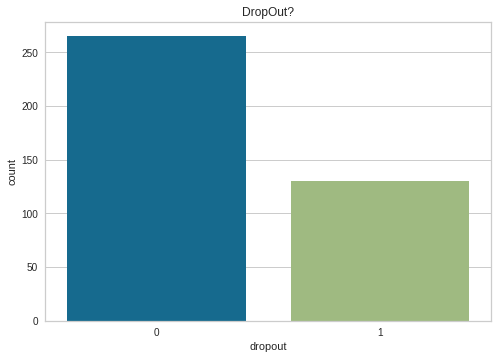

In [81]:
# sns.catplot(x="dropout", kind="count", data=data)
sns.countplot('dropout', data=data)
plt.title('DropOut?')

In [82]:
data['dropout'].value_counts(normalize=True)

0    0.670886
1    0.329114
Name: dropout, dtype: float64

In [83]:
Dropout_data =[data.dropout.value_counts()]

print("Total passed(0): {}".format(Dropout_data[0][0]))
print("Pass Percentage: {}\n".format(round(Dropout_data[0][0]*100/(Dropout_data[0][0]+Dropout_data[0][1]),2)))

print("Total Dropped Out(1): {}".format(Dropout_data[0][1]))
print("Dropout Percentage Percentage: {}".format(round(Dropout_data[0][1]*100/(Dropout_data[0][0]+Dropout_data[0][1]),2)))

Total passed(0): 265
Pass Percentage: 67.09

Total Dropped Out(1): 130
Dropout Percentage Percentage: 32.91


*For optimal/high accuracy, a good dataset must not contain features with high correaltion among them.
The `.corr()` method of pandas library helps us to find the co-relation among the features.*

In [84]:
corMatrix = data.corr().abs()
corMatrix

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,dropout
school,1.000000,0.012286,0.377610,0.279797,0.064866,0.045923,0.133333,0.079807,0.056670,0.018974,...,0.133578,0.060700,0.047926,0.032988,0.007152,0.114209,0.065087,0.042651,0.088480,0.031254
sex,0.012286,1.000000,0.028606,0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.044113,0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,0.066962,0.070618
age,0.377610,0.028606,1.000000,0.146722,0.037847,0.029598,0.163658,0.163438,0.069104,0.035191,...,0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,0.062187,0.175230,0.179645
address,0.279797,0.028504,0.146722,1.000000,0.072472,0.042572,0.138804,0.072178,0.108818,0.001911,...,0.216842,0.005257,0.014258,0.034878,0.068835,0.093494,0.101126,0.040355,0.027874,0.052282
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,0.149612,0.043068,0.058879,0.071386,0.084448,...,0.000720,0.034395,0.022776,0.017695,0.023064,0.101521,0.103425,0.028992,0.035783,0.041842
Pstatus,0.045923,0.023443,0.029598,0.042572,0.149612,1.000000,0.123565,0.088730,0.054476,0.033892,...,0.070074,0.040451,0.025179,0.038717,0.003459,0.030590,0.006045,0.022307,0.134937,0.044050
Medu,0.133333,0.078228,0.163658,0.138804,0.043068,0.123565,1.000000,0.623455,0.454805,0.157920,...,0.201463,0.039681,0.003914,0.030891,0.064094,0.019834,0.047123,0.046878,0.100285,0.115396
Fedu,0.079807,0.034878,0.163438,0.072178,0.058879,0.088730,0.623455,1.000000,0.243327,0.200169,...,0.127507,0.015602,0.001370,0.012846,0.043105,0.002386,0.012631,0.014742,0.024473,0.108057
Mjob,0.056670,0.191421,0.069104,0.108818,0.071386,0.054476,0.454805,0.243327,1.000000,0.196758,...,0.216969,0.062999,0.038584,0.114321,0.003169,0.076076,0.012051,0.065220,0.050254,0.026592
Fjob,0.018974,0.084957,0.035191,0.001911,0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.035777,0.000583,0.013709,0.047475,0.010340,0.077897,0.070024,0.018058,0.008196,0.028309


*Since the upper triangle and lower triangle matrices are same, we shall consider any one of them.*

In [85]:
    upper_matrix = corMatrix.where(np.triu(np.ones(corMatrix.shape),k=1).astype(np.bool_))
    upper_matrix.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,dropout
school,NaN,0.012286,0.377610,0.279797,0.064866,0.045923,0.133333,0.079807,0.056670,0.018974,...,0.133578,0.060700,0.047926,0.032988,0.007152,0.114209,0.065087,0.042651,0.088480,0.031254
sex,NaN,NaN,0.028606,0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.044113,0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,0.066962,0.070618
age,NaN,NaN,NaN,0.146722,0.037847,0.029598,0.163658,0.163438,0.069104,0.035191,...,0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,0.062187,0.175230,0.179645
address,NaN,NaN,NaN,NaN,0.072472,0.042572,0.138804,0.072178,0.108818,0.001911,...,0.216842,0.005257,0.014258,0.034878,0.068835,0.093494,0.101126,0.040355,0.027874,0.052282
famsize,NaN,NaN,NaN,NaN,NaN,0.149612,0.043068,0.058879,0.071386,0.084448,...,0.000720,0.034395,0.022776,0.017695,0.023064,0.101521,0.103425,0.028992,0.035783,0.041842


In [86]:
drop_columns = [col for col in upper_matrix if any(upper_matrix[col]>0.65)]
print(drop_columns)

[]


*The features of the dataset are not highly co-related. Hence, no features are required to be removed.*

In [87]:
X = data.drop('dropout', axis=1)
y= data.dropout

In [88]:
data.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,dropout
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,0.031254
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,-0.070618
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,0.179645
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.216842,0.005257,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,-0.052282
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,0.000720,0.034395,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,-0.041842
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,0.070074,-0.040451,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,0.044050
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,-0.115396
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,-0.108057
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.216969,-0.062999,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,-0.026592
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.035777,-0.000583,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,-0.028309


##Data Visualization

*By using pandas, matplotlib and seaborn libraries we can visualize the data graphically and can understand more clearly.*

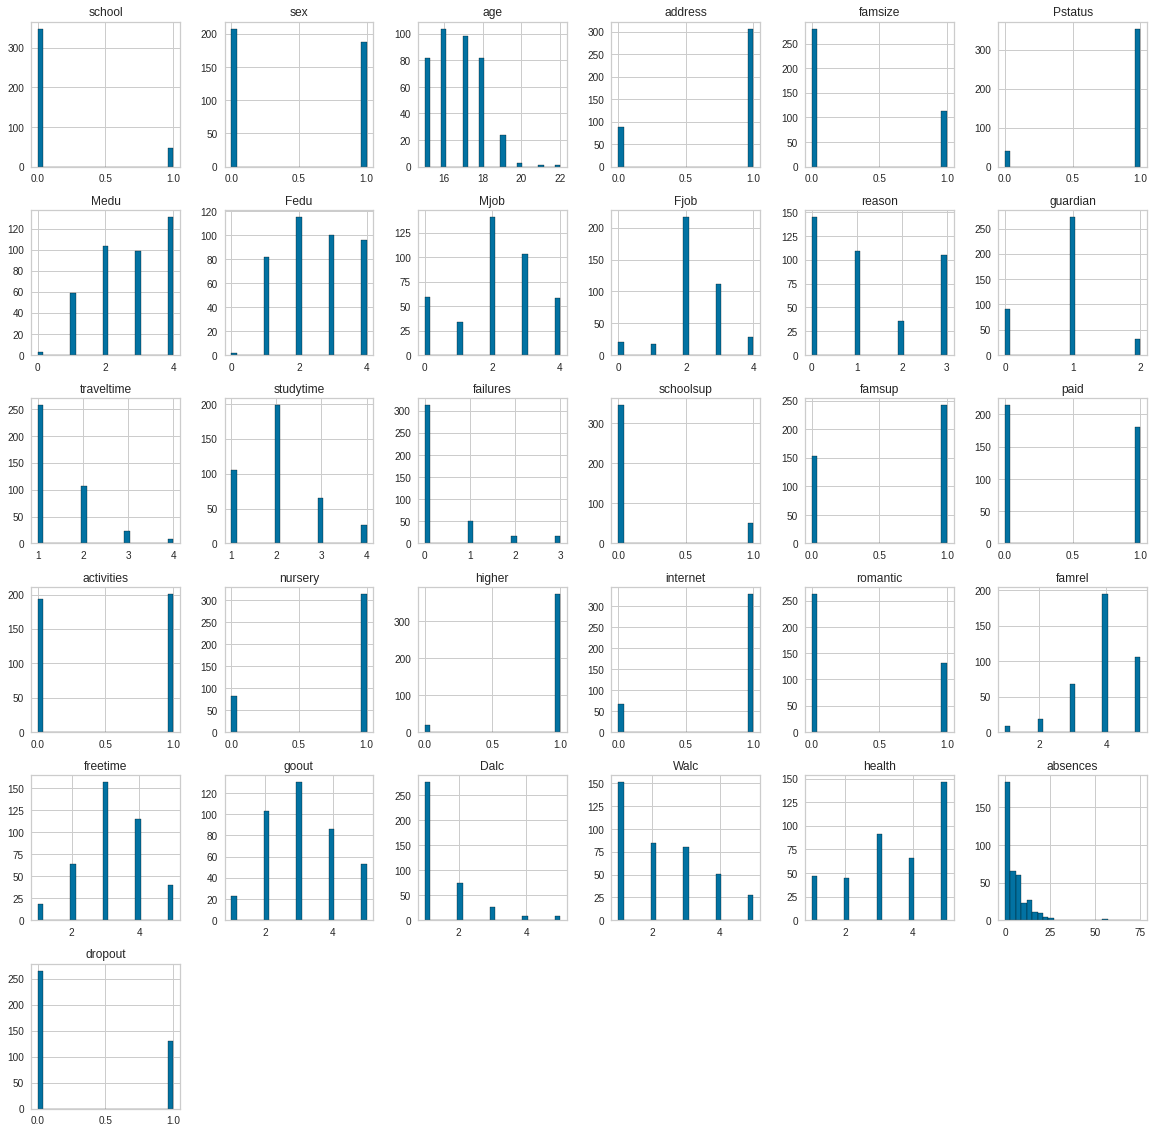

In [89]:
data.hist(edgecolor='black',bins = 25, figsize= (20,20))
plt.show()

*The `hist()` method of pandas is used to represent the histograms of each feature specified in the data frame.*

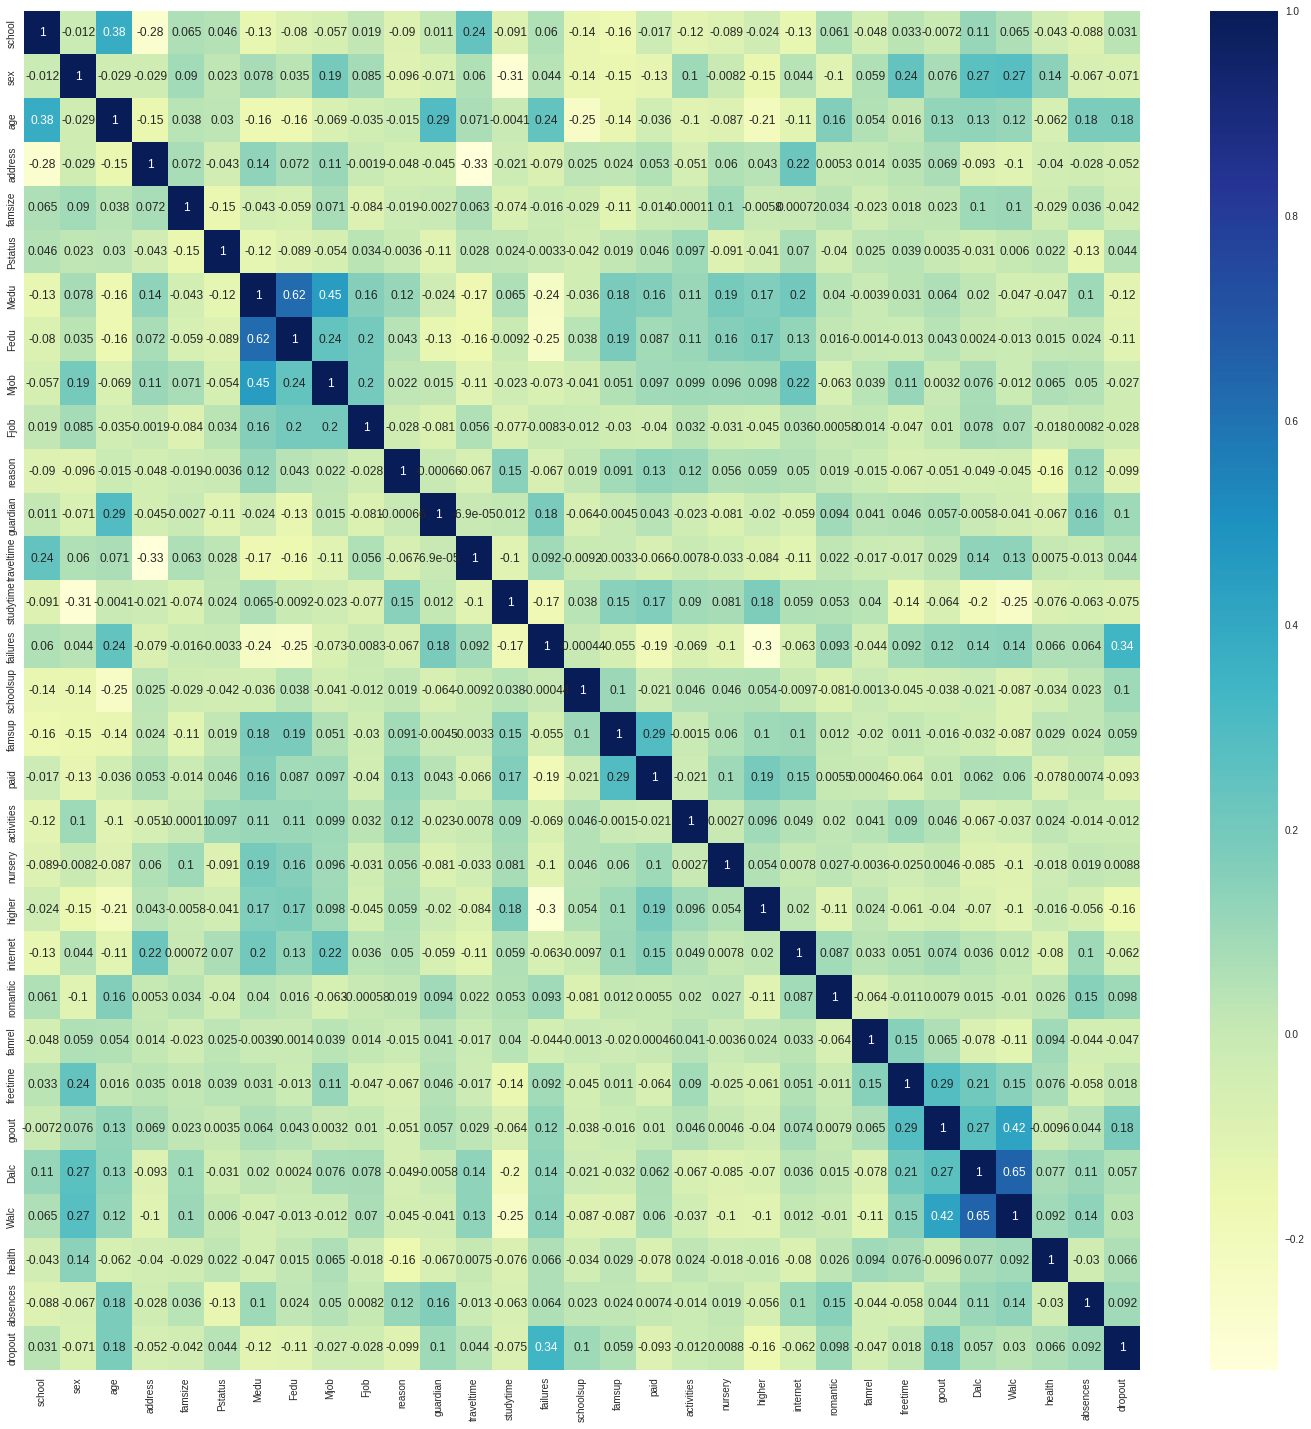

In [90]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

> *Feature Selection*

Reducing features from the dataset.

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = SelectFromModel(DecisionTreeClassifier())
model.fit(X_train, y_train)

model.get_support()
selected_feat= X_train.columns[(model.get_support())]

print("The reduced features (The Features that have greater impact on target) :")
for feature in selected_feat:
  print(feature)
print("The number of Reduced features : {}".format(len(selected_feat)))

The reduced features (The Features that have greater impact on target) :
school
Fedu
reason
traveltime
studytime
failures
schoolsup
activities
freetime
goout
Dalc
health
absences
The number of Reduced features : 13


In [92]:
df = pd.DataFrame(data=data, columns=selected_feat)
df_target = data['dropout']
# df1 = pd.concat([df, df_target], ignore_index=True, sort=False)
df = df.join(df_target, lsuffix='_caller', rsuffix='_other')
df.head()

,school,Fedu,reason,traveltime,studytime,failures,schoolsup,activities,freetime,goout,Dalc,health,absences,dropout
0,0,4,0,2,2,0,1,0,3,4,1,3,6,1
1,0,1,0,1,2,0,0,0,3,3,1,3,4,1
2,0,1,2,1,2,3,1,0,3,2,2,3,10,0
3,0,2,1,1,3,0,0,1,2,2,1,5,2,0
4,0,3,1,1,2,0,0,0,3,2,1,5,4,0


In [93]:
X = df.drop('dropout',axis=1)
y = df.dropout

In [94]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# rus = RandomUnderSampler() 
# X, y = rus.fit_resample(X, y)


ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)


# sampler = SMOTE()
# X, y = sampler.fit_resample(X, y)

# # data.isnull().sum()

# X = X_ros
# y = y_ros

> Splitting data for Training and Testing

In [95]:
#splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

> Training the models and Evaluating their performance

*Since the target feature is categorical, the Machine learning models that are used to train and predict on this dataset should be of type Classification.*

*The various metrics for evaluating Classification models are*




> Confusion matrix
 *   Accuracy
 *   Recall
 *   Precision
 *   F1_score
 
> Classification Report







In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [97]:
scores_df=pd.DataFrame({'Model':[], 'F1_score':[], 'Accuracy':[]})

### Logistic Regression

*`Logistic Regression` is used for predicting the categorical dependent variable using a given set of independent variables.*

In [98]:
# logistic regression
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(C=0.1, max_iter=250, class_weight="unbalanced")

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(model).__name__,f1_score(y_test, y_pred)))

scores_df = scores_df.append(pd.DataFrame({'Model':[type(model).__name__],
                               'F1_score':[f1_score(y_test, y_pred)],
                               'Accuracy':[accuracy_score(y_test, y_pred)]
                               }), ignore_index=True)

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        62
           1       0.64      0.61      0.63        44

    accuracy                           0.70       106
   macro avg       0.69      0.69      0.69       106
weighted avg       0.70      0.70      0.70       106

LogisticRegression's F1_Score :0.6279069767441862


The Accuracy of LogisticRegression is 0.72 and F1_score is 0.82

### Naive Bayes ( BernoulliNB )

*`Naïve Bayes` algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.*

In [99]:
#naive bayes
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(model).__name__,f1_score(y_test, y_pred)))

scores_df = scores_df.append(pd.DataFrame({'Model':[type(model).__name__],
                               'F1_score':[f1_score(y_test, y_pred)],
                               'Accuracy':[accuracy_score(y_test, y_pred)]
                               }), ignore_index=True)

              precision    recall  f1-score   support

           0       0.73      0.60      0.65        62
           1       0.55      0.68      0.61        44

    accuracy                           0.63       106
   macro avg       0.64      0.64      0.63       106
weighted avg       0.65      0.63      0.63       106

BernoulliNB's F1_Score :0.6060606060606061


The Accuracy of Bernoulli Naive Bayes Classifier is 0.75 and F1_score is 0.84

### K Nearest Neighbour

*`K-NN` algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.*

In [100]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7, algorithm='auto')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(model).__name__,f1_score(y_test, y_pred)))

scores_df = scores_df.append(pd.DataFrame({'Model':[type(model).__name__],
                               'F1_score':[f1_score(y_test, y_pred)],
                               'Accuracy':[accuracy_score(y_test, y_pred)]
                               }), ignore_index=True)

              precision    recall  f1-score   support

           0       0.77      0.65      0.70        62
           1       0.59      0.73      0.65        44

    accuracy                           0.68       106
   macro avg       0.68      0.69      0.68       106
weighted avg       0.70      0.68      0.68       106

KNeighborsClassifier's F1_Score :0.6530612244897959


The Accuracy of KNN Classifier is 0.68 and F1_score is 0.81

### Decision Tree

*`Decision Tree` is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.*

In [101]:
#decision tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(model).__name__,f1_score(y_test, y_pred)))

scores_df = scores_df.append(pd.DataFrame({'Model':[type(model).__name__],
                               'F1_score':[f1_score(y_test, y_pred)],
                               'Accuracy':[accuracy_score(y_test, y_pred)]
                               }), ignore_index=True)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        62
           1       0.71      0.93      0.80        44

    accuracy                           0.81       106
   macro avg       0.82      0.83      0.81       106
weighted avg       0.84      0.81      0.81       106

DecisionTreeClassifier's F1_Score :0.803921568627451


The Accuracy of Decision Tree Classifier is 0.68 and F1_score is 0.77

### Support Vector Machine

*`SVM` algorithm creates the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.*

In [102]:
# svm

from sklearn.svm import SVC

model = SVC(C=0.001)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(model).__name__,f1_score(y_test, y_pred)))

scores_df = scores_df.append(pd.DataFrame({'Model':[type(model).__name__],
                               'F1_score':[f1_score(y_test, y_pred)],
                               'Accuracy':[accuracy_score(y_test, y_pred)]
                               }), ignore_index=True)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.42      1.00      0.59        44

    accuracy                           0.42       106
   macro avg       0.21      0.50      0.29       106
weighted avg       0.17      0.42      0.24       106

SVC's F1_Score :0.5866666666666668


The Accuracy of Support Vector Machine Classifier is 0.71 and F1_score is 0.83

### Random Forest Classifier

*`Random Forest` is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.*

In [103]:
#random forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=13, criterion='gini',max_depth=10, max_features='auto')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(model).__name__,f1_score(y_test, y_pred)))

scores_df = scores_df.append(pd.DataFrame({'Model':[type(model).__name__],
                               'F1_score':[f1_score(y_test, y_pred)],
                               'Accuracy':[accuracy_score(y_test, y_pred)]
                               }), ignore_index=True)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83        62
           1       0.72      0.93      0.81        44

    accuracy                           0.82       106
   macro avg       0.83      0.84      0.82       106
weighted avg       0.85      0.82      0.82       106

RandomForestClassifier's F1_Score :0.8118811881188119


The Accuracy of Random Forest Classifier is 0.75 and F1_score is 0.83

*Here we are using `Yellowbrick` for visualization of model prediction*

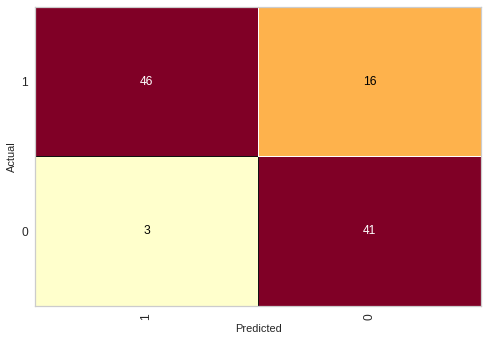

In [104]:
classes = [1,0]
from yellowbrick.classifier import ConfusionMatrix
visualizer = ConfusionMatrix(model, classes=classes, support=True) 
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

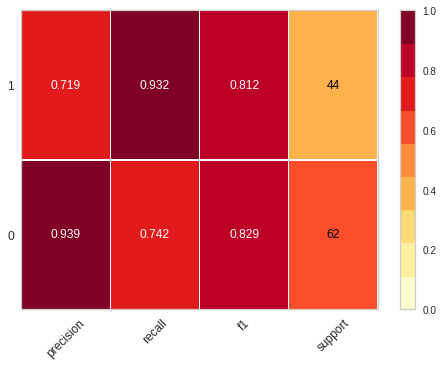

In [105]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(model, classes=classes, support=True) 
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)
plt.show()

Text(0.5, 1.0, 'Predicted against Actual plot')

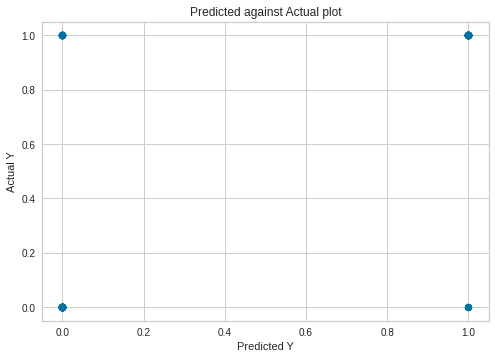

In [106]:
plt.scatter(y_test,y_pred)
plt.xlabel("Predicted Y")
plt.ylabel("Actual Y")
plt.title("Predicted against Actual plot")

### XGBOOST

In [107]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)
num_cols = X.select_dtypes(include="number").columns

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
    ]
)

X_processed = full_processor.fit_transform(X)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1)
)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, stratify=y_processed, random_state=50
)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
# print('{}\'s Accuracy :{}'.format(type(model).__name__,round(accuracy_score(y_test, y_pred),2)))
print('{}\'s F1_Score :{}'.format(type(model).__name__,f1_score(y_test, y_pred)))

scores_df = scores_df.append(pd.DataFrame({'Model':[type(model).__name__],
                               'F1_score':[f1_score(y_test, y_pred)],
                               'Accuracy':[accuracy_score(y_test, y_pred)]
                               }), ignore_index=True)

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        67
           1       0.74      0.64      0.68        66

    accuracy                           0.71       133
   macro avg       0.71      0.71      0.71       133
weighted avg       0.71      0.71      0.71       133

XGBClassifier's F1_Score :0.6829268292682926


The Accuracy of XGBOOST Classifier is 0.72 and F1_score is 0.81

Since the data is unbalanced F1_score is considered superior to model accuracy in determining the better ML algorithm.

Therefore, the Accuracy and F1_Score of different models stated above are

In [109]:
scores_df

,Model,F1_score,Accuracy
0,LogisticRegression,0.627907,0.698113
1,BernoulliNB,0.606061,0.632075
2,KNeighborsClassifier,0.653061,0.679245
3,DecisionTreeClassifier,0.803922,0.811321
4,SVC,0.586667,0.415094
5,RandomForestClassifier,0.811881,0.820755
6,XGBClassifier,0.682927,0.706767


## Conclusion


---


Among the above classifiers `Random Forest Classifier` performs well on this dataset. It has higher values in terms of both Accuracy - 80% and F1 Score - 0.84(approximately)

<!-- The deployment of this model can be seen here - [LINK](https://dropout-predictor.herokuapp.com) -->